# Oasis Infobyte 

## Task5 - Sales Prediction

## Name - Rahul Sunil Sardesai
### Nov P1 Batch


In [11]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [12]:
data=pd.read_csv("Advertising.csv")
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


<AxesSubplot:xlabel='TV', ylabel='Sales'>

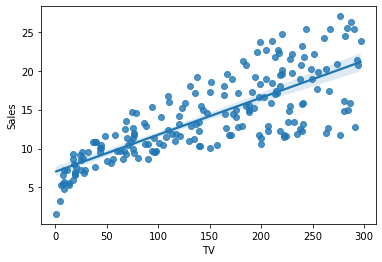

In [13]:
sns.regplot(x="TV" , y="Sales", data=data)

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

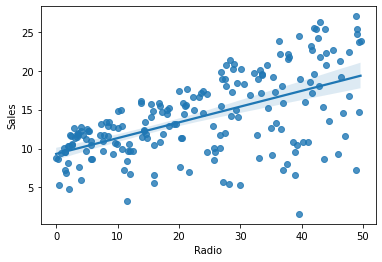

In [14]:
sns.regplot(x="Radio" , y="Sales", data=data)

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

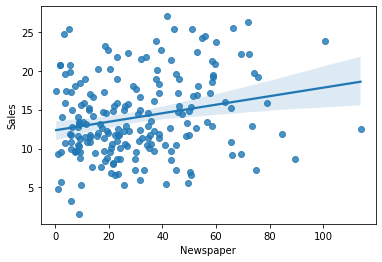

In [15]:
sns.regplot(x="Newspaper" , y="Sales", data=data)

### Visualization all three variables at onse.

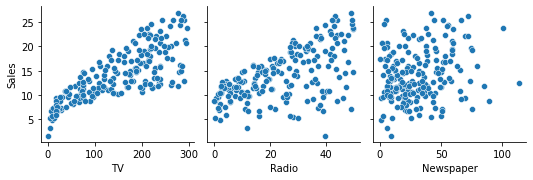

In [16]:
sns.pairplot(data=data,x_vars=['TV','Radio','Newspaper'],y_vars='Sales')

## Checking Corelation for each

In [17]:
data.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


## Corelation- Matrix

<AxesSubplot:>

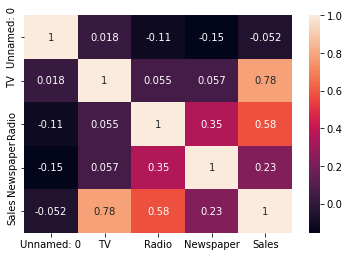

In [18]:
sns.heatmap(data.corr(), annot=True)

## Outliers Analysis

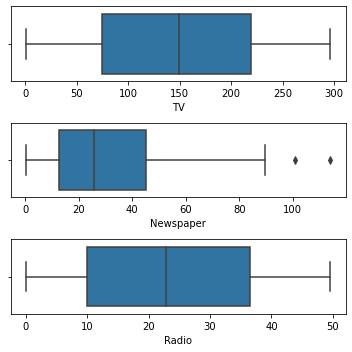

In [19]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(data['TV'], ax = axs[0])
plt2 = sns.boxplot(data['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(data['Radio'], ax = axs[2])
plt.tight_layout()

### There are no considerable outliers present in the data.

# Step2: Applying simple linear Regression Model

In [20]:

import statsmodels
import statsmodels.api as sm
import sklearn

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
# Create X(upper case)  and y(lower case): convention
X=data["TV"]
y=data["Sales"]

In [23]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.70 , random_state=100)

In [24]:
X_train.shape

(140,)

In [25]:
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [26]:
# fitting Model
#first create an onject of class OLS ordinary Least Square.
lr = sm.OLS(y_train, X_train_sm)
#fitting object
lr_model = lr.fit()
#printing parameters
lr_model.params

const    6.989666
TV       0.046497
dtype: float64

In [27]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     219.0
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           2.84e-30
Time:                        20:56:12   Log-Likelihood:                -370.62
No. Observations:                 140   AIC:                             745.2
Df Residuals:                     138   BIC:                             751.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9897      0.548     12.762      0.000       5.907       8.073
TV             0.0465      0.003     14.798      0.000       0.040       0.053
==============================================================================
Omnibus:                        0.995   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.608   Jarque-Bera (JB):                0.970
Skew:                          -0.008   Prob(JB):                        0.616
Kurtosis:                       2.593   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred

74     16.912202
3      14.034016
185    16.521624
26     13.634138
90     13.234261
         ...    
87     12.136923
103    15.726520
67     13.466748
24      9.886451
8       7.389543
Length: 140, dtype: float64

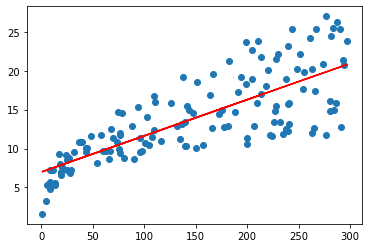

In [29]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred , 'r')
plt.show()

<Figure size 432x288 with 0 Axes>

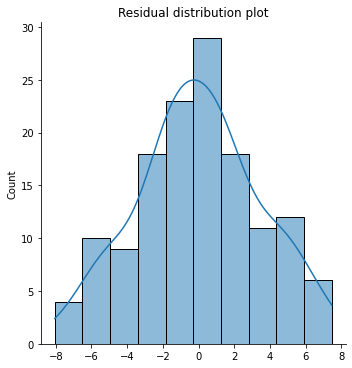

In [30]:
res = y_train - y_train_pred
plt.figure()
sns.displot(res, kde=True)
plt.title("Residual distribution plot")
plt.show()

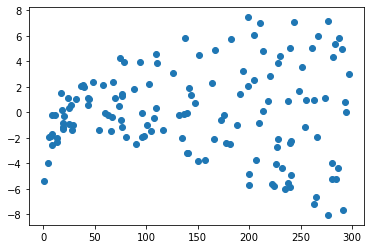

In [31]:
# we can also look for some patterns ( there should not be any pattrn between errors.)

plt.scatter(X_train, res)
plt.show()

In [32]:
# add a contsnt/intercept to test
X_test_sm = sm.add_constant(X_test)

# Pred on test
y_test_pred = lr_model.predict(X_test_sm)

In [33]:
# Evaluate the model , R-squared, and other statistics on the test
# to do this we need some libraries , that are 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [34]:
# R-squared
r_square = r2_score(y_true = y_test , y_pred = y_test_pred)
r_square

0.59429872677833

In [35]:
r_square_train = r2_score(y_true = y_train , y_pred = y_train_pred)
r_square_train

0.6134312469429993

In [36]:
# mean_squared_error
mean_squared_error(y_true = y_test , y_pred = y_test_pred)

7.975798532854855

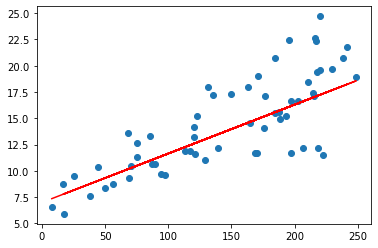

In [37]:
# ploting test
plt.scatter(X_test , y_test)
plt.plot(X_test , y_test_pred , 'r')
plt.show()

In [38]:
r = 4 
c = 5
final1 = [0]*c 
final = [(final1) for h in range(r)] 
print(final1) 
print(final)

[0, 0, 0, 0, 0]
[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]


In [39]:
for i in range(r): 
    for j in range(c): 
        if i==0 or j==0 or i==r-1 or j==c-1: 
            final[i][j] = 1
            
print (final)

[[1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1]]


# Conclusion ->

### In conclusion, the Sales Prediction using a Linear Regression Model in Python provides a valuable tool for businesses to make informed decisions based on historical sales data. By leveraging the predictive capabilities of the model, organizations can gain insights into potential future sales trends, identify key factors influencing sales, and optimize strategies for enhanced performance. It is crucial to ensure the quality of input data, perform thorough feature engineering, and fine-tune the model parameters to achieve accurate predictions. Additionally, ongoing monitoring and model evaluation are essential for maintaining the model's relevance and effectiveness over time. Overall, the implementation of a well-constructed Linear Regression Model empowers businesses to navigate market dynamics, allocate resources efficiently, and ultimately drive sustainable growth in sales.